In [1]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.signal as sig
import os
from jupyterthemes import jtplot

In [2]:
%matplotlib inline
jtplot.reset()
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["font.family"] = "serif"
mp.rcParams["text.usetex"] = True

In [3]:
def Vr(Vi, w, R, C):
    return w*R*C/(1 + w*R*C) * Vi

def H(w, R, C):
    return 1j*w*R*C/(1 + 1j*w*R*C)

def Hc(w, R, C):
    return 1/(1 + 1j*w*R*C)

In [4]:
R = 100
C = 1e-6
Vi = 5
w = np.linspace(10, 3e6, 1000000)

1/(2*np.pi*R*C)

1591.5494309189535

5.4 0.38
5.0 2.32
3.8 3.6
4.8 2.64
4.8 2.72
4.4 2.72
4.8 2.88
4.4 2.88
4.4 3.04
4.6 3.28
5.2 1.42
4.0 3.44


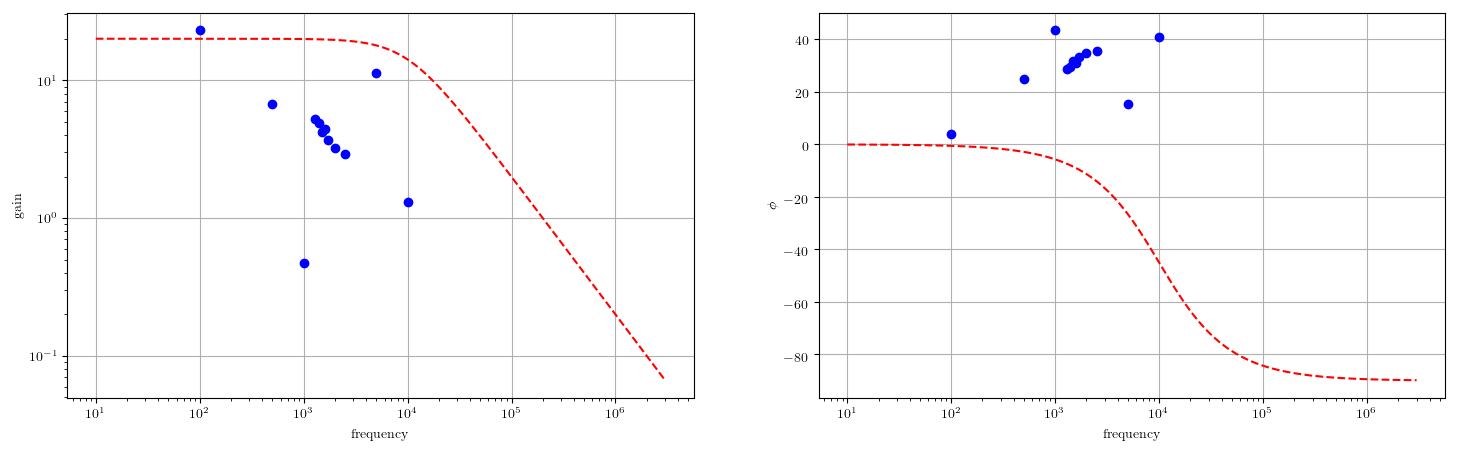

In [5]:
gain = []
phase = []
old_flist = np.array([10, 100, 1e3, 10e3, 100e3, 1e6, 3e6])
old_flist3 = np.array([10, 50, 100, 500, 1000, 1300, 1400, 1500, 1600, 1700, 2000, 2.5e3, 3e3, 5e3, 10e3, 50e3, 1e6])
old_flist2 = np.array([100, 500, 1e3, 1.1e3, 1.2e3, 1.3e3, 1.4e3, 1.5e3, 1.6e3, 2e3, 2.5e3, 5e3, 10e3])
flist = np.array([100, 500, 1e3, 1.3e3, 1.4e3, 1.5e3, 1.6e3, 1.7e3, 2e3, 2.5e3, 5e3, 10e3])
    
for _, __, files in os.walk("./HPF"):
    for file in files:
        if file.endswith(".csv"):
            t, Vin, Vout, Vnull = np.genfromtxt("HPF/" + file, skip_header=2, delimiter=",").T
            print(Vin.max(), Vout.max())
            t += abs(t.min())
            gain.append(-20*np.log10(Vout.max()/Vin.max()))
            phase.append(np.arctan(Vout.max()/Vin.max()))
            

gain = np.array(gain)
phase = np.array(phase) * 180/np.pi
fig = mp.figure(figsize=(5*16/9*2, 5))

ax = fig.add_subplot(121)
ax.plot(flist, gain, "bo")
ax.plot(w, 20*abs(Hc(w, R, C)), "r--")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("frequency")
ax.set_ylabel("gain")
ax.grid(True)

ax = fig.add_subplot(122)
phi = Hc(w, R, C)
phi = np.arctan(phi.imag/phi.real) * 180/np.pi
ax.plot(flist, phase, "bo")
ax.plot(w, phi, "r--")
ax.set_xscale("log")
ax.set_xlabel("frequency")
ax.set_ylabel(r"$\phi$")
ax.grid(True)

mp.show()